<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/learning-Machine-learning/blob/main/Clustering/Cluster_stability%2C_metrics_Silhouette%2CDBouldin%2C_Calinski%2C_select_dimensions_based_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [1]:
import pandas as pd

Import data

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"
dataframe = pd.read_csv(uri)
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Clean the data

remove some columns

In [6]:
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


Find missing data: Credit Limit and Minimum payment

In [7]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


Replace missing values by their respective medians

In [8]:
dataframe.fillna(dataframe.median(), inplace=True) # replace by the median
missing = dataframe.isna().sum()
print(missing) # see now that we no longer have missing data

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


Normalize our data. 

In [9]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values) 
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


# Cluster data with K-Means and validate cluster methods

K-means is non deterministic, thus every time I run it a different result can happen. n_init prevents that as it determines that K-means resturns the same value n_init times 

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

## Cluster internal validation

How to validate our clusters? Metrics are based in two concepts

*   Compact is our obs in the clusters. This is given by the distance among the obs
*   Separation: verifies how far/separate are the clusters, for example clusters very close to each other are not very good



The metrics based on the above concepts are:
*   **Silhouette coefficients** is based on how compact are the clusters. It calculates i) the distance between a given obs and all the obs within the same clusters and take the average of the distances, it does so for each obs in the cluster and calculates ii) the distance between a given obs and all obs from other clusters. The value of the coeff is between [-1,1]. Values closer to 1 indicate that the clusters are separated one from the other which is a good sign.

*  **Davies-Bouldin**: measures how similar are the clusters. In the previous metric (silhouette) we were calculating i) the distance between a given obs and the other ones within the cluster and ii) betwenn the obs and other clusters. In this case, it calculates i) the distance of each obs to the center of the cluster (centroid) and then calculate the average of the distances between the obs and the centroid. Also, in this case, it calculates ii) the distance between the centroids. This metric is obtained by dividing the distances calculates in i) and ii). David-Bouldin coefficient minimum value is zero, and the closer to zero the better is our clusters (more similar the clusters are)

* **Calinski-Harabasz** considers the obs dispersion. It compares obs dispersion within and between clusters and normalize them by the numbers of obs and clusters. Within dispersion is calculated using a var-cov matrix, it takes the difference of each obs to the cluster centroid and then calculates such differences in a var-cov matrix (the var gives the distance between the obs). It does so for each cluster and then assemble the values of the matrixes. Between dispersion calculates the distance between the total centroid and the clusters' centroids and calculates var cov matrixes. We aim the highest possible value for this metric.



**Silhouette Coefficient:**

In [12]:
from sklearn import metrics
labels = kmeans.labels_ # attribute a label to each cluster
silhouette = metrics.silhouette_score(values,labels,metric='euclidean') # euclidean is the most used distance metric
print(silhouette) # 0.36 is a good value

0.36454479258047573


As such metric varies [-1,1] we can assess how good is the obtained value

**Davies-Bouldin coefficient**

In [13]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0760464906093192


**Calinski-Harabasz coefficient**

In [14]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.790347716921


## Relative validation

We need to evaluate the previous metrics. We will do so by simulating the parameters of the cluster algorithms and verifying the outcome metricts.

In [19]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300) #n_cluster is the number of clusters which we will simulate
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean') # calculate silhouette coeff
    dbs = metrics.davies_bouldin_score(dataset, labels) # calculate favies bouldin coeff
    calinski = metrics.calinski_harabasz_score(dataset, labels) # calculate calinsky coeff
    return s, dbs, calinski

Setting K=3

In [20]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32724464582661594 1.309350766214331 3526.4668344515408


Setting K=5

In [21]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645977697890941 1.0758050540473227 3431.783259433212


Setting K=10

In [23]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
print(s3, dbs3, calinski3)

0.26884202052478734 1.2201402635585752 2396.2142205744594


Shilhouette is the most popular metric. Here maybe K=5 is the a good option, but K=3 wouldn't be so bad.

We can **compare our clustered dataset with a random clustered dataset**

Create a new random dataset

In [24]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

We have 16 columns (variables) and 8950 obs

We create a random dataset with this shape

In [25]:
import numpy as np
random_data = np.random.rand(8950,16) # 8950 obs and 16 columns

Calculate the metrics for the random dataset

In [26]:
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.03983196768150905 3.509870745154783 303.10240169012934
0.3645977697890941 1.0758050540473227 3431.783259433212


See that the metrics related to the random dataset are much worst than the ones from our initial dataset. Silhouett is higher, Davies Bouldin lower and Calinski higher, so better results in all 3 metrics.

## Cluster stability

Calculate the clusters in subsets of the dataset.

First divide our dataset, then create the clusters and calculate the metrics

In [27]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.056334697944936 1204.111582769171
0.35406999696241026 1.1389554530299943 1194.945411949724
0.36704188760608253 1.0984932613776763 1167.5309516804


See that the metrics are stable even in subsets of the data, which is a good sign.

# Interpret clusters

### Visualize them

We cannot visualize all the 16 dimensions. First visualize 2 of them

<function matplotlib.pyplot.show>

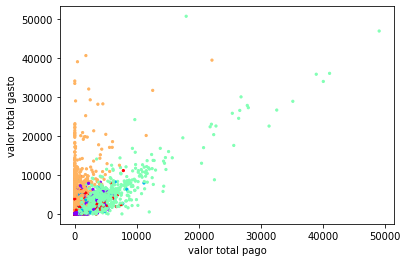

In [28]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' ) # s is the size of the obs, cmap stands for the colors
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

Visually we can only see that in the first group the obs increase in the Y-axis but not in the X-axis while the second biggest group has both X and Y axis "Moving" together.

Lets plot more dimensions. More specifically all the pairs of attributes. Given we have so many dimensions, there are a lot of graphs and we cannot infer nothing concrete. Visualization is not the way to guide our interpretation of the data.

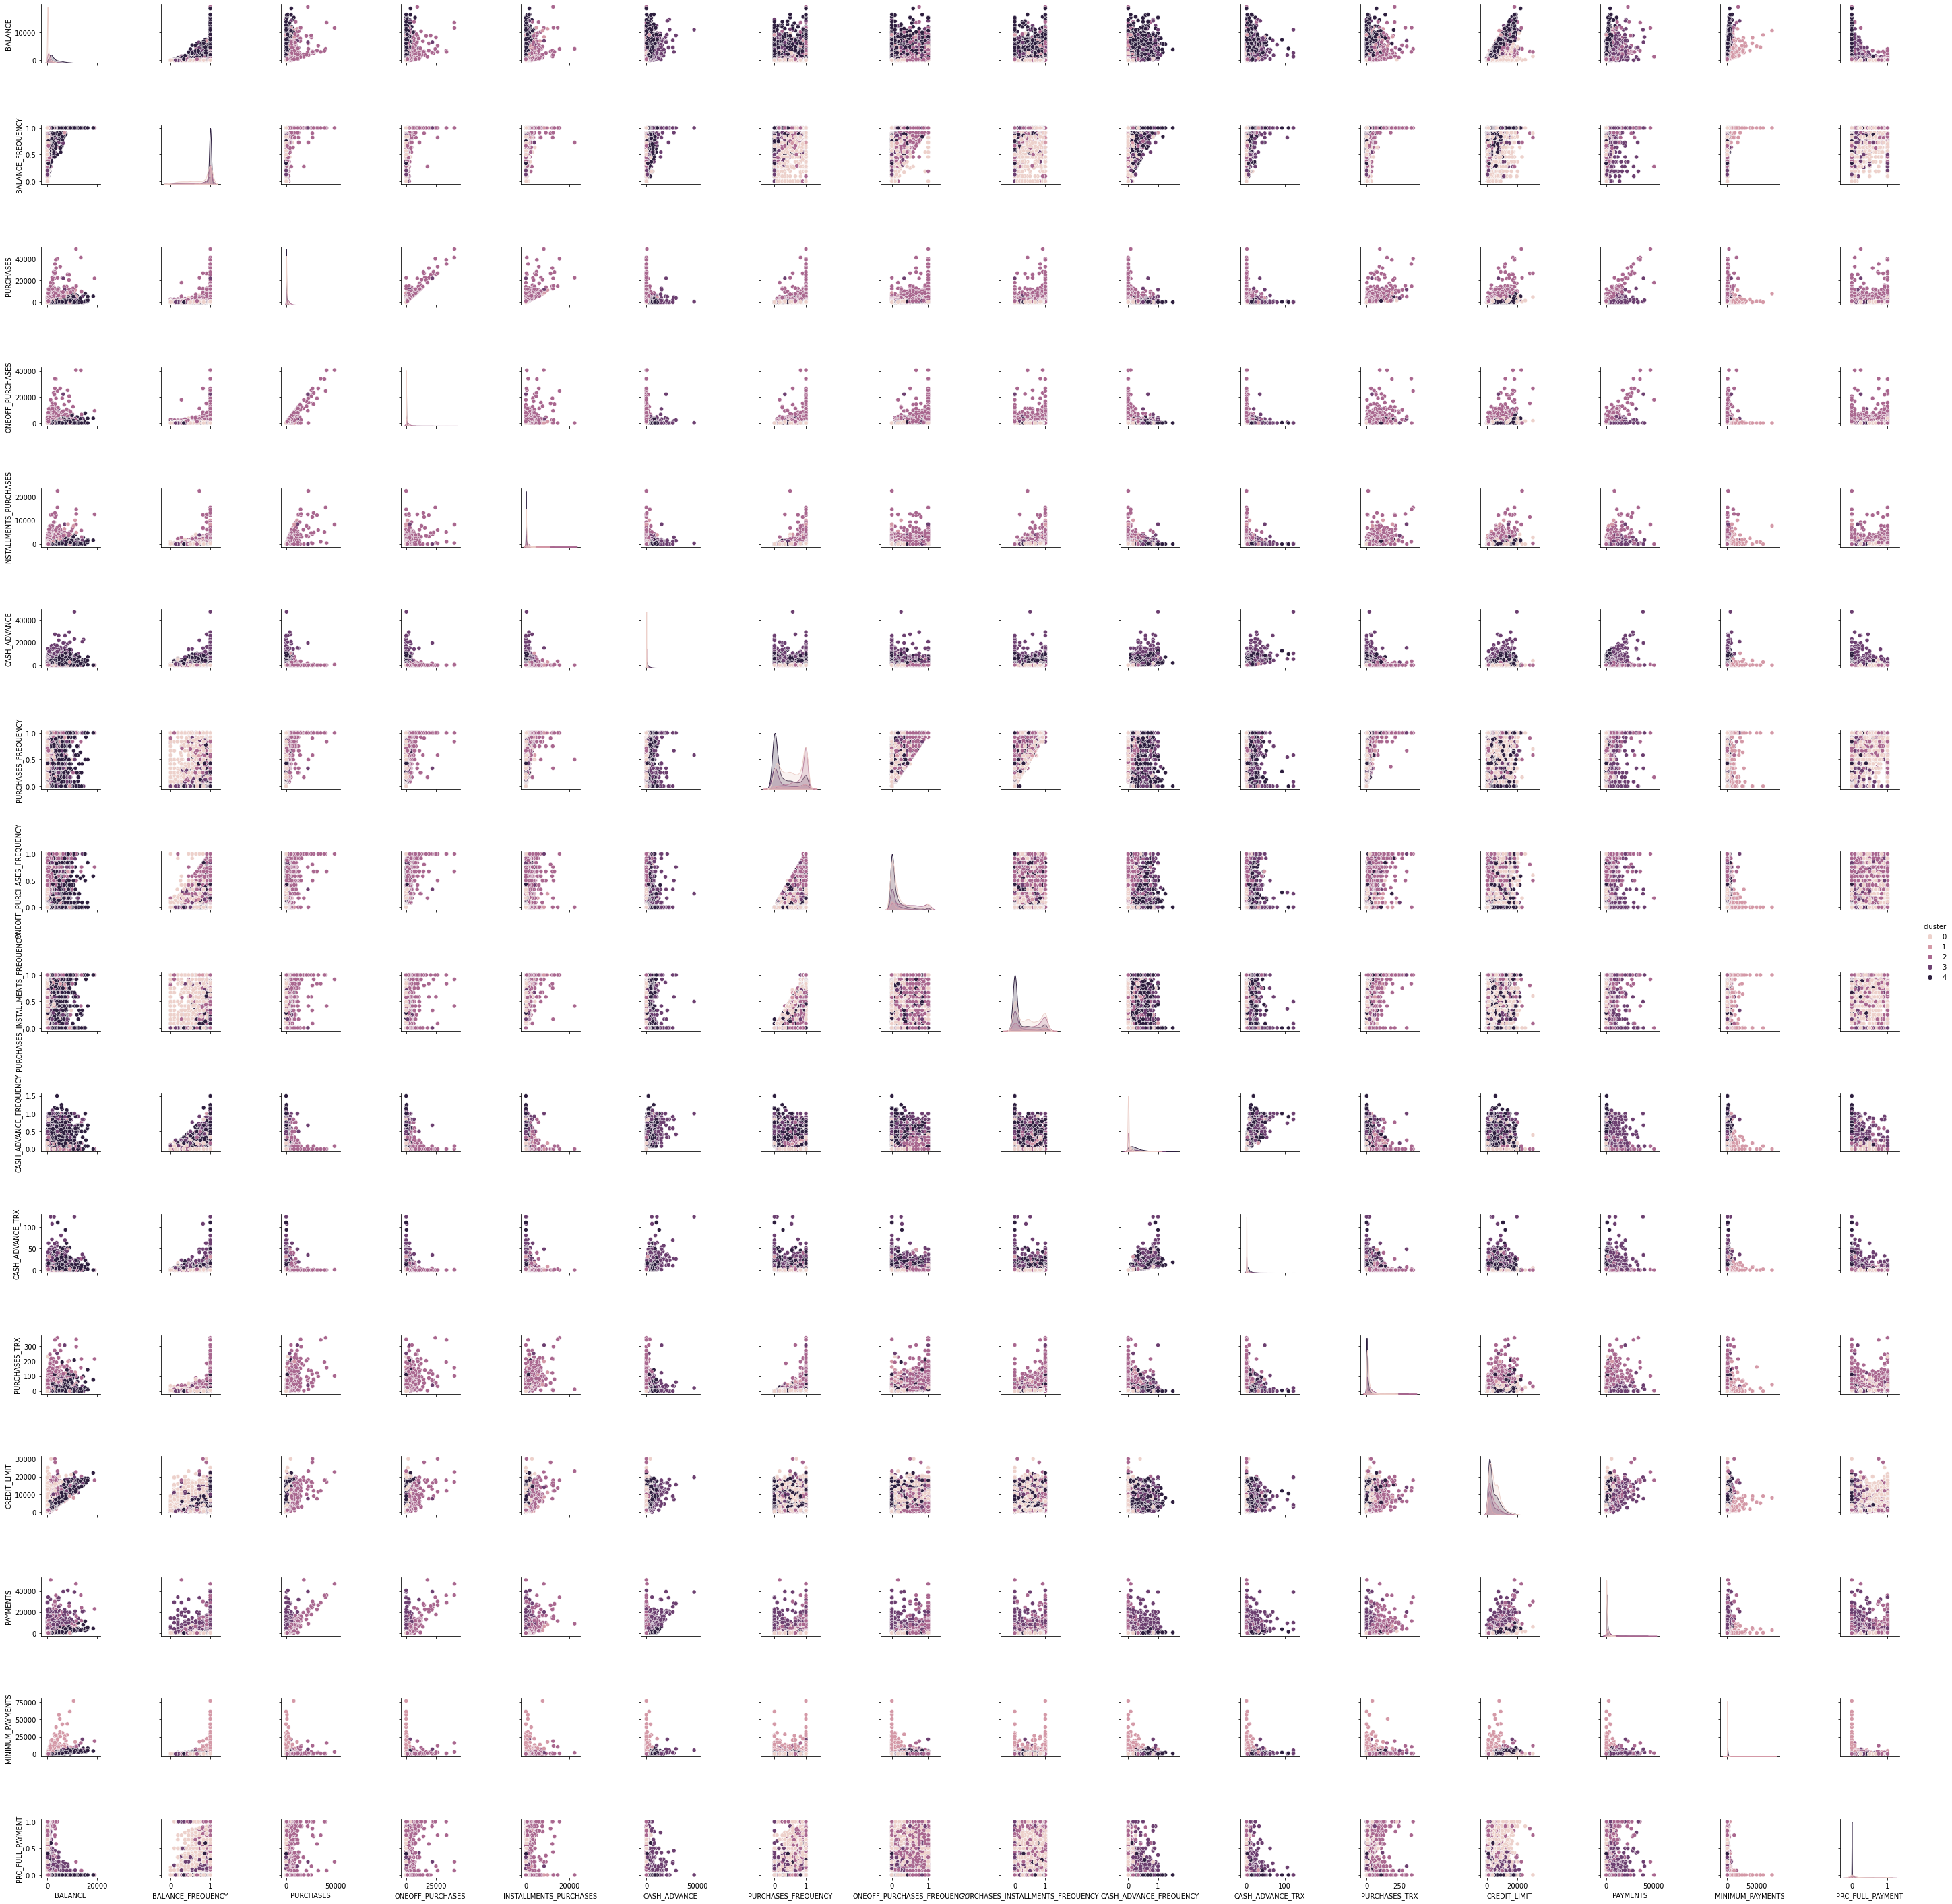

In [29]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

### Verify the characteristics of the clusters dimensions

Verify the pattern of the attributes by clusters

In [30]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3279.0   443.776995   846.525522   0.000000    23.340435   
1         412.0  1987.146873  1852.215743  70.794108  1020.146724   
2        1536.0  1141.865757  1664.809840   0.000000   212.178230   
3        1073.0  1795.328292  1982.485775   0.000000   507.076999   
4        2650.0  3036.946177  2478.922442   6.824905  1255.154881   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.902896   410.659944   9630.367575            3279.0  0.774514   
1        1338.918346  2133.415063  11670.179850             412.0  0.989512   
2         554.332740  1370.056708  19043.138560            1536.0  0.928220   
3        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
4        2173.994774  4223.858877  18495.558550            2650.0  0.963514   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.766884   4483.503862           3279.0  0.246881   
1        ...      7086.774783  76406.207520            412.0  0.019271   
2        ...       523.540210  18621.013310           1536.0  0.278331   
3        ...       884.183626  21235.065300           1073.0  0.117430   
4        ...      1330.541571   8345.641905           2650.0  0.001798   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346775  0.0  0.0  0.000000  0.444444  1.0  
1        0.090795  0.0  0.0  0.000000  0.000000  1.0  
2        0.367137  0.0  0.0  0.083333  0.545455  1.0  
3        0.186772  0.0  0.0  0.083333  0.142857  1.0  
4        0.023256  0.0  0.0  0.000000  0.000000  0.6  

[5 rows x 128 columns]

However, given the high number of dimensions, it is still a lot to make sense of. So select the relevant dimensions/attributes.

OBS: another way out is to reduce the dimensionality of your dataset keeping the cluster power.

### Selecting only the most significant dimensions 

But we can find the most significant dimensions checking their variance

First calculate the centroids. Below you have the values of all the 16 dimensions for each cluster, see the number of columns and rows below. We then will compare the variance for each one of the dimensions in each cluster to keep the most relevant dimension. In other words, we look at each dimension centroid in each cluster, we want to ignore the dimensions centroids that are similar across the clusters as they do not reveal variation/contrasts between the clusters. We want to keep the dimensions that present higher variation among the clusters.

In [31]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.89799575e-02 2.30763006e-04 1.21587120e-01 4.79794677e-02
  7.37079733e-02 2.40200669e-02 1.73016299e-04 3.36944404e-05
  1.40456777e-04 7.83464589e-06 1.22859223e-04 2.86637386e-03
  9.43639117e-01 1.53810130e-01 5.68564456e-02 7.61967577e-05]
 [3.33483624e-01 2.68969713e-04 1.59146477e-01 3.61931219e-02
  1.23336164e-01 5.80731211e-02 1.67333390e-04 2.64804728e-05
  1.47698430e-04 1.92281888e-05 4.25862512e-04 3.87053484e-03
  3.77114118e-01 2.52735252e-01 6.78741705e-01 4.21940580e-06]
 [1.59872633e-01 2.45335780e-04 4.38628565e-01 2.57276648e-01
  1.81523763e-01 2.58896564e-02 2.04405504e-04 8.91003532e-05
  1.50573918e-04 9.39953463e-06 1.70012472e-04 6.17608469e-03
  6.03886132e-01 4.02529446e-01 8.52570022e-02 7.19925505e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [5.

Calculate the variance of each one of the dimensions

In [32]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0541
PRC_FULL_PAYMENT 
0.0000


The dimensions with higher variances are:
* BALANCE 0.0224
* PURCHASES 0.0196
* CASH_ADVANCE 0.0226
* CREDIT_LIMIT 0.0360
* PAYMENTS 0.0280
* MINIMUM_PAYMENTS 0.0542

We will consider only them to analyse the clusters.

You can verify each of these dimensions

In [33]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3279.0,443.776995,846.525522,0.000000,23.340435,82.902896,410.659944,9630.367575
1,412.0,1987.146873,1852.215743,70.794108,1020.146724,1338.918346,2133.415063,11670.179850
2,1536.0,1141.865757,1664.809840,0.000000,212.178230,554.332740,1370.056708,19043.138560
3,1073.0,1795.328292,1982.485775,0.000000,507.076999,1088.056301,2315.003636,14581.459140
4,2650.0,3036.946177,2478.922442,6.824905,1255.154881,2173.994774,4223.858877,18495.558550


Verify the dimensions with higher variances

In [36]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0         443.776995   629.282729    140.652097   5130.892579   814.340168
1        1987.146873   858.326286    420.107194   2226.699029  1338.974045
2        1141.865757  3274.071901    183.496011   4098.802182  3037.137165
3        1795.328292   476.810531   3267.199032   3982.452201  4713.384730
4        3036.946177   385.299102   1637.380994   4495.584906   968.775192


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


You can check some more information

In [37]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size() # number of obs in the cluster
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.776995   629.282729    140.652097   5130.892579   814.340168   
1        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
2        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
3        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
4        3036.946177   385.299102   1637.380994   4495.584906   968.775192   

         n_clients  
cluster             
0             3279  
1              412  
2             1536  
3             1073  
4             2650  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


You can see already some differences between the clusters:

CLUSTER 0: Customers who spend little. Clients with the highest limit. Good payers. Greater number of customers.

CLUSTER 1: Customers who spend the most. Their focus is loot. Worst payers. Good amount of customers.

CLUSTER 2: Customers who spend a lot on purchases. Best payers.

CLUSTER 3: Customers who spend a lot on withdrawals. Pay sometimes.

CLUSTER 4: Clients with the lowest limit. They are not good payers. Lesser number of customers.

We can check how the different cluster pay

In [38]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3279.0,0.246881,0.346775,0.0,0.0,0.000000,0.444444,1.0
1,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
2,1536.0,0.278331,0.367137,0.0,0.0,0.083333,0.545455,1.0
3,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0
4,2650.0,0.001798,0.023256,0.0,0.0,0.000000,0.000000,0.6


A business decision would define different strategies for each cluster. Cluster 0 and 2 has potential to expand the sales, while cluster 1 is a dangerous group of clients. 
A business test would be to create a **AB test**, in other words test the strategy (for example points programme) within a given cluster. Why? Because in a AB test you need groups with similar characteristics.